In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
#load the dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
#we will encoding the data
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array

array([[False, False,  True, False, False,  True, False,  True, False,
         True,  True, False],
       [False, False,  True, False, False,  True, False, False, False,
         True,  True,  True],
       [ True, False, False,  True, False,  True,  True,  True, False,
        False, False, False],
       [ True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False],
       [False,  True, False, False, False,  True, False,  True,  True,
         True, False, False]])

In [9]:
#creating a dataframe from our numpy array te_array
df = pd.DataFrame(te_array, columns=te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [10]:
#select the item who is 60% support
support = apriori(df, min_support = 0.6)
support

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [11]:
#support with column name
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [12]:
#association based on confidence
#select item who is confidence 70%
confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [13]:
#association based on lift
#select item who is lift 12%
lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


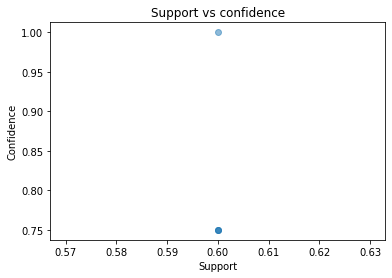

In [14]:
#lets try to some visualisation before applying the apriori algoritthm
#visualizing results support confidence

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

plt.scatter(rules['support'], rules['confidence'], alpha = 0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs confidence')
plt.show()

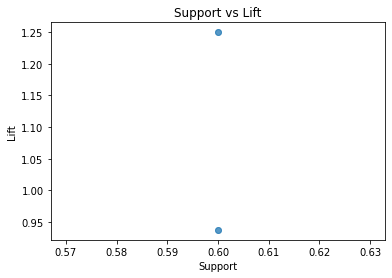

In [15]:
#visualising result support vs lift
plt.scatter(rules['support'], rules['lift'], alpha = 0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

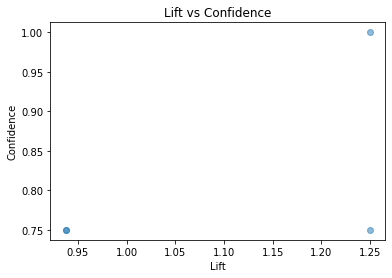

In [16]:
#visualising result confidence vs lift
plt.scatter(rules['lift'], rules['confidence'], alpha = 0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

In [17]:
#let's do the same checkpoint but with a bigger dataset
#load the dataset
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [19]:
#view the list of the transactions
transactions = [] 
for i in range(7501):
    transactions.append([str(data.values[i,j]) for j in range(20)])#converting the items of transaction in a list
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [20]:
#encoding the data
array = te.fit(transactions).transform(transactions)
array


array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [21]:
#creating a dataframe from our numpy array array
creat_df = pd.DataFrame(array, columns=te.columns_)
creat_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
#list of the columns in creat_df
for column in creat_df.columns:
    print(column)

 asparagus
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray
bramble
brownies
bug spray
burger sauce
burgers
butter
cake
candy bars
carrots
cauliflower
cereals
champagne
chicken
chili
chocolate
chocolate bread
chutney
cider
clothes accessories
cookies
cooking oil
corn
cottage cheese
cream
dessert wine
eggplant
eggs
energy bar
energy drink
escalope
extra dark chocolate
flax seed
french fries
french wine
fresh bread
fresh tuna
fromage blanc
frozen smoothie
frozen vegetables
gluten free bar
grated cheese
green beans
green grapes
green tea
ground beef
gums
ham
hand protein bar
herb & pepper
honey
hot dogs
ketchup
light cream
light mayo
low fat yogurt
magazines
mashed potato
mayonnaise
meatballs
melons
milk
mineral water
mint
mint green tea
muffins
mushroom cream sauce
nan
napkins
nonfat milk
oatmeal
oil
olive oil
pancakes
parmesan cheese
pasta
pepper
pet food
pickles
protein bar
red wine
rice
salad
salmon
salt
sandwich
shallot
sha

In [23]:
#dropping the 'nan' columns
basket_cleans = creat_df.drop(['nan'], axis=1)
basket_cleans

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


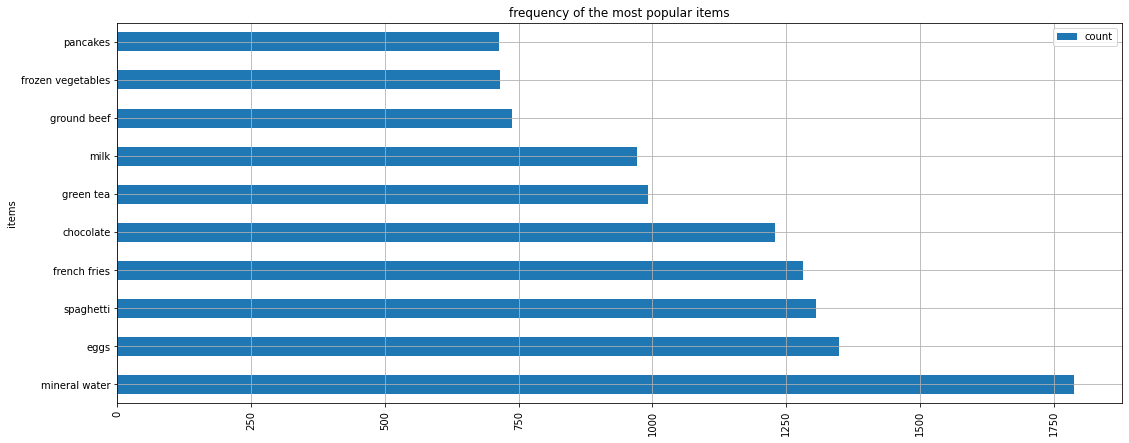

In [24]:
#most populary item
count = basket_cleans.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items",0: "count"})
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('frequency of the most popular items')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### interpretation
the miniral water is the most represented item

In [25]:
#using of apriori algorithm
#select the item who is 4% support
support_items = apriori(basket_cleans, min_support = 0.04)
support_items

,support,itemsets
0,0.087188,(15)
1,0.081056,(17)
2,0.046794,(22)
3,0.059992,(23)
4,0.163845,(25)
5,0.080389,(30)
6,0.051060,(31)
7,0.179709,(37)
8,0.079323,(40)
9,0.170911,(43)


In [26]:
#support with column name
frequent_items = apriori(basket_cleans, min_support=0.04, use_colnames=True)
frequent_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


In [27]:
#association based on confidence
#select item who is confidence 2%
confidence_items = association_rules(frequent_items, metric="confidence", min_threshold=0.02)
confidence_items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [28]:
#association based on lift
#select item who is lift 100%
lift_items = association_rules(frequent_items, metric="lift", min_threshold=1)
lift_items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


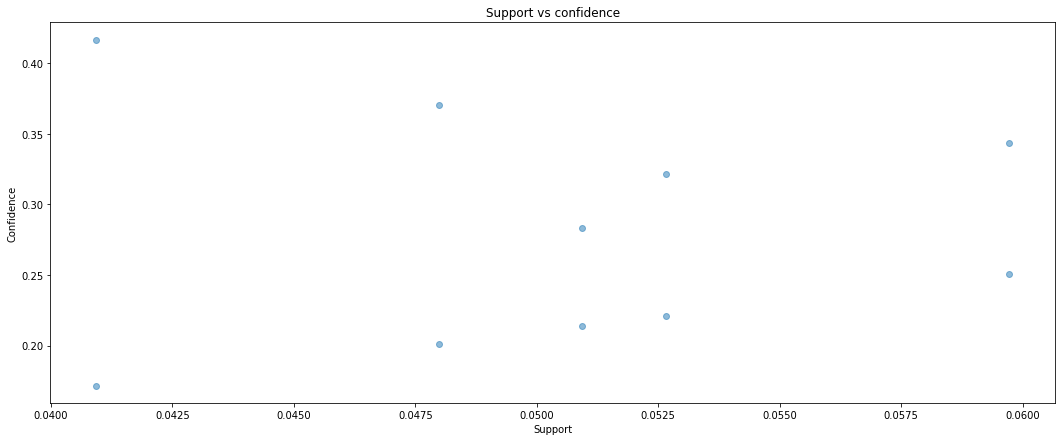

In [29]:
#lets try to some visualisation before applying the apriori algoritthm
#visualizing support vs confidence
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.02)

plt.scatter(rules['support'], rules['confidence'], alpha = 0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs confidence')
plt.show()

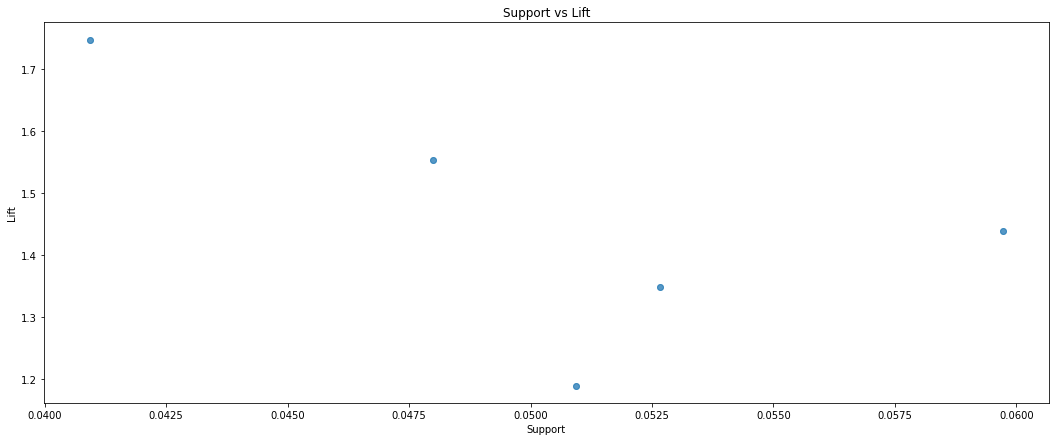

In [30]:
#visualising result support vs lift
plt.scatter(rules['support'], rules['lift'], alpha = 0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

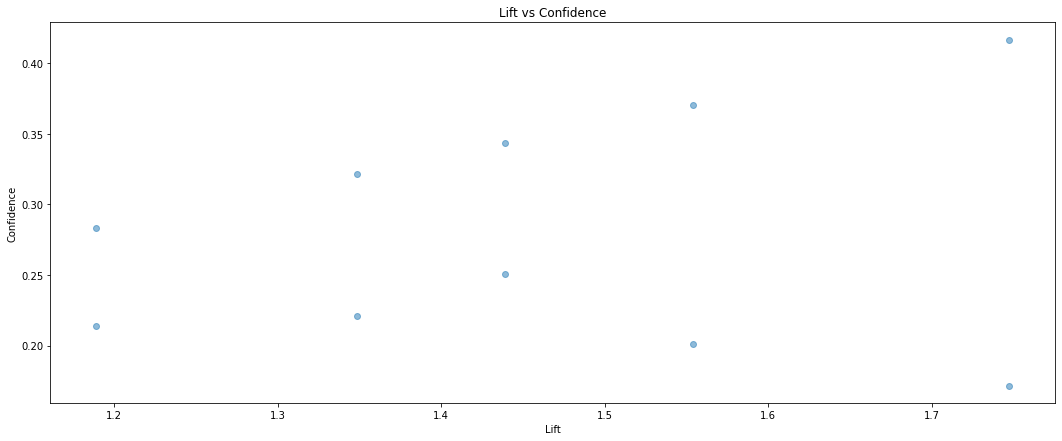

In [31]:
#visualising result confidence vs lift
plt.scatter(rules['lift'], rules['confidence'], alpha = 0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()